In [91]:
from functions import *
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures,RobustScaler,Normalizer
from sklearn.linear_model import Ridge,LinearRegression,Lasso,ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.metrics import *
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve, RandomizedSearchCV,KFold,cross_val_score
from sklearn.dummy import DummyRegressor
import pickle

In [92]:
df = pd.read_csv("dataset_clear.csv")

In [93]:
df

,age,sex,bmi,children,smoker,region,charges,cat_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obesity
2,28,male,33.000,3,no,southeast,4449.46200,obesity
3,33,male,22.705,0,no,northwest,21984.47061,healthy
4,32,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830,obesity
1333,18,female,31.920,0,no,northeast,2205.98080,obesity
1334,18,female,36.850,0,no,southeast,1629.83350,obesity
1335,21,female,25.800,0,no,southwest,2007.94500,overweight


In [94]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'cat_bmi'],
      dtype='object')

In [95]:
feature = df.columns[0:-1]
target = 'charges'
X =df.drop(["charges","bmi"],axis=1)
y = df[target]



In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=True, random_state=42, train_size = 0.8,stratify=X[["smoker"]])

In [97]:
numerical_features = [
       'age','children'
       ]
categorical_features = [
       'sex' , 'smoker', 'region',"cat_bmi"
       ]



In [98]:


my_col_trans = ColumnTransformer([
    ("sclal",StandardScaler(),numerical_features),
    ("one_hot_encoder",OneHotEncoder(handle_unknown='ignore'),categorical_features),
])



In [99]:
dummy = DummyRegressor()

In [100]:
dummy.fit(X_train,y_train)
dummy.score(X_train,y_train)

0.0

In [101]:
dummy.score(X_test,y_test)

-0.0010185684988295307

In [102]:
modelLR= make_pipeline(my_col_trans,PolynomialFeatures(degree=2), LinearRegression())
modelLR.fit(X_train,y_train)
modelLR.score(X_train,y_train)


0.8588381209284734

In [103]:
modelLR.score(X_test,y_test)

0.9125868967386107

In [104]:
print(r2_score(modelLR.predict(X_test),y_test))
print(mean_squared_error(modelLR.predict(X_test),y_test,squared=False))

0.903276125273242
3549.8002458341366


In [105]:
modelRidge= make_pipeline(my_col_trans,PolynomialFeatures(degree=2), Ridge(alpha=2))
modelRidge.fit(X_train,y_train)
modelRidge.score(X_train,y_train)

0.8586096597292594

In [106]:
modelRidge.score(X_test,y_test)

0.9148320868155257

In [107]:
print(r2_score(modelRidge.predict(X_test),y_test))
print(mean_squared_error(modelRidge.predict(X_test),y_test,squared=False))

0.9037857493345745
3503.915699791672


In [108]:
# modelLasso= make_pipeline(my_col_trans,PolynomialFeatures(degree=2), Lasso(max_iter=100000,random_state=42))
# parameters = {"lasso__alpha":np.linspace(0.1,100,1000)}
# randm_src = GridSearchCV(estimator=modelLasso, param_grid=parameters,scoring='r2',cv=5)
# randm_src.fit(X_train, y_train)

# modelLasso.set_params(**randm_src.best_params_)
# print(randm_src.best_params_)
# best=randm_src.best_params_

In [109]:
best={'lasso__alpha': 35.900000000000006}

In [110]:
modelLasso= make_pipeline(my_col_trans,PolynomialFeatures(degree=2), Lasso(alpha=best["lasso__alpha"],max_iter=100000,random_state=42))

kfold =KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(modelLasso,X_train,y_train)
print(scores)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.83150368 0.85048833 0.84709673 0.89501111 0.80076025]
CV Accuracy: 0.84 (+/- 0.06)


In [111]:
modelLasso.fit(X_train,y_train)
modelLasso.score(X_train,y_train)

0.855390416919604

In [112]:
modelLasso.score(X_test,y_test)

0.9184589572469776

In [113]:
print(r2_score(modelLasso.predict(X_test),y_test))
print(mean_squared_error(modelLasso.predict(X_test),y_test,squared=False))

0.9061160815532053
3428.497020618863


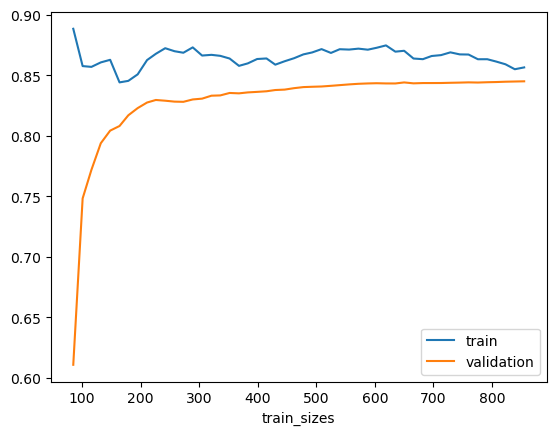

In [114]:
train_sizes, train_scores, test_scores = learning_curve(modelLasso,X_train,y_train,cv=5,train_sizes=np.linspace(0.1, 1.0, 50))                                    
                                           
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()

In [115]:
y_pred = modelLasso.predict(X_train)

In [116]:
residual = (y_pred - y_train).abs().sort_values(ascending=False)

In [117]:
residual.describe()

count     1069.000000
mean      2600.014220
std       3811.667124
min          3.627878
25%       1132.199983
50%       1585.148515
75%       2013.160642
max      23915.938278
Name: charges, dtype: float64

In [118]:
y_pred

array([ 9549.39388401, 16740.2171241 , 10896.96268052, ...,
        6703.40981003, 12769.62107145,  4201.81610512])

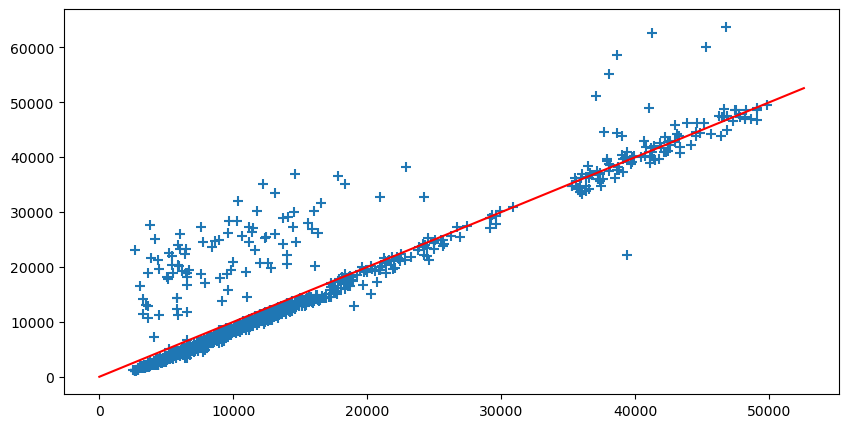

In [119]:
plt.subplots(figsize=(10, 5))
plt.scatter(y_pred,y_train,marker="+",s=50)
plt.plot(np.arange(max(y_test.values)), np.arange(max(y_test.values)), '-', color='r')
plt.show()


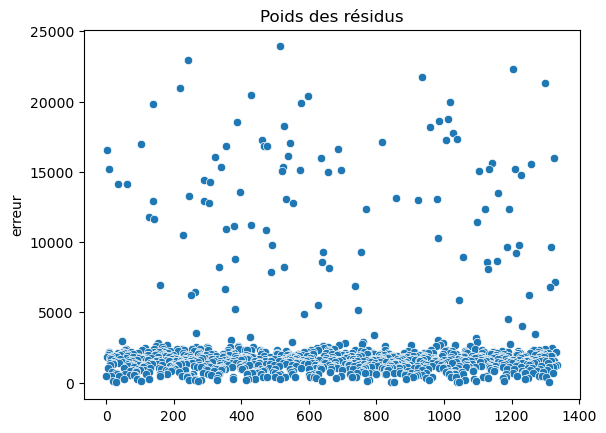

In [120]:


sns.scatterplot(residual)
plt.title('Poids des résidus')
plt.ylabel('erreur')
plt.show()



In [121]:
# to_drop = residual[residual > 10000].index

In [122]:
# X_train.loc[to_drop]

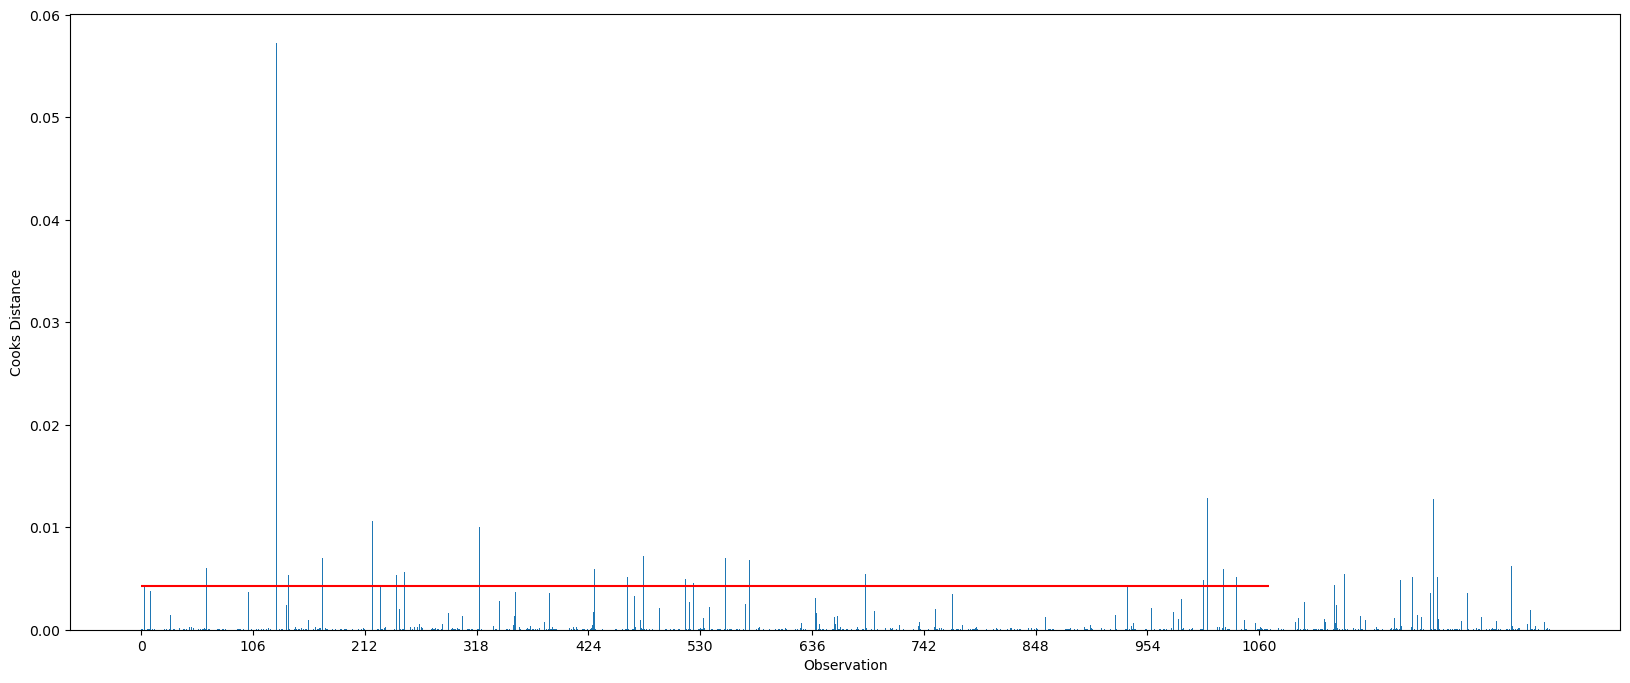

In [123]:


# X_train = X_train.drop(to_drop)
# y_train = y_train.drop(to_drop)
index_to_be_removed = get_index_to_remove_by_Cooks_Distance(X_train=X_train, y_train=y_train, preprocessor=make_pipeline(my_col_trans,PolynomialFeatures(degree=2)))




In [124]:
X_train.loc[index_to_be_removed]

,age,sex,children,smoker,region,cat_bmi
1205,59,female,2,no,southwest,obesity
554,25,female,0,no,northeast,morbid_obesity
516,20,male,1,no,southeast,obesity
526,19,female,2,no,northwest,obesity
1011,61,female,4,no,southeast,obesity
1007,25,male,2,no,northeast,healthy
1131,57,male,0,no,northeast,morbid_obesity
219,24,female,0,no,southeast,healthy
380,27,female,2,yes,northeast,underweight
321,26,female,4,no,northeast,overweight


In [125]:

X_train = X_train.drop(index=index_to_be_removed.values)
y_train = y_train.drop(index=index_to_be_removed.values)

In [126]:
# parameters = {"lasso__alpha":np.linspace(0.1,100,1000)}
# randm_src = GridSearchCV(estimator=modelLasso, param_grid=parameters,scoring='r2',cv=5)
# randm_src.fit(X_train, y_train)

# modelLasso.set_params(**randm_src.best_params_)
# print(randm_src.best_params_)
modelLasso.set_params(**{'lasso__alpha': 12.9})


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('sclal', StandardScaler(),
                                                  ['age', 'children']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker', 'region',
                                                   'cat_bmi'])])),
                ('polynomialfeatures', PolynomialFeatures()),
                ('lasso', Lasso(alpha=12.9, max_iter=100000, random_state=42))])

In [127]:
kfold =KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(modelLasso,X_train,y_train)
print(scores)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.92422231 0.8881404  0.92072259 0.92098764 0.86236447]
CV Accuracy: 0.90 (+/- 0.05)


In [128]:


modelLasso.fit(X_train,y_train)
modelLasso.score(X_train,y_train)



0.91077652079626

In [129]:


modelLasso.score(X_test,y_test)



0.9219965193200647

In [130]:
y_pred = modelLasso.predict(X_train)
residual = (y_pred - y_train).abs().sort_values()

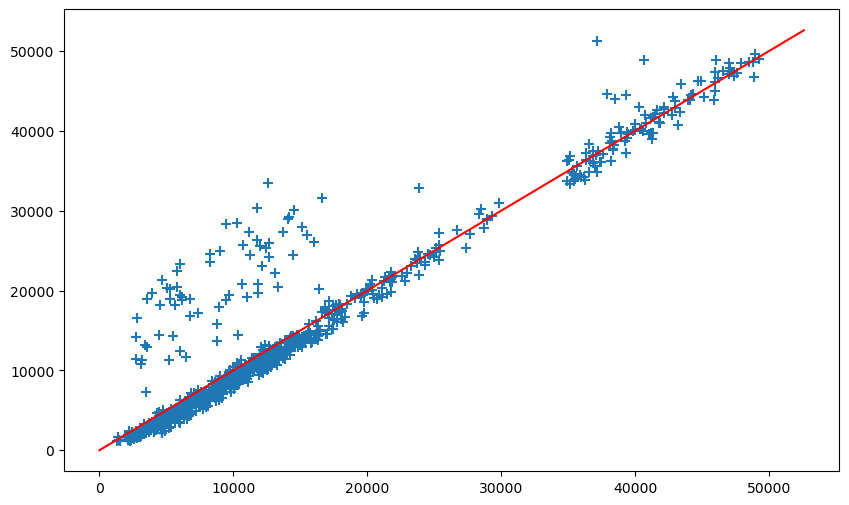

In [131]:
plt.subplots(figsize=(10, 6))
plt.scatter(y_pred,y_train,marker="+",s=50)
plt.plot(np.arange(max(y_test.values)), np.arange(max(y_test.values)), '-', color='r')
plt.show()

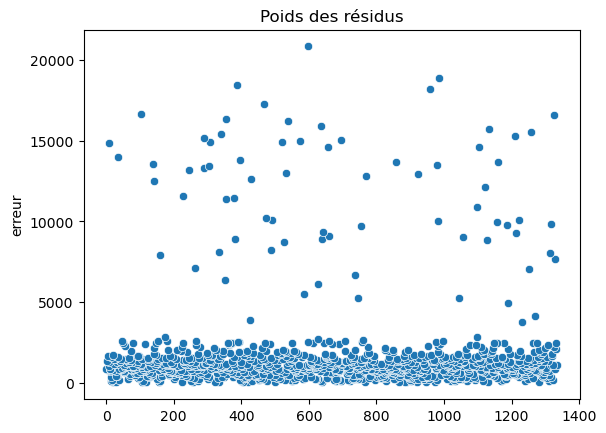

In [132]:
sns.scatterplot(residual)
plt.title('Poids des résidus')
plt.ylabel('erreur')
plt.show()

In [133]:
residual.describe()

count     1035.000000
mean      1796.080320
std       2979.225638
min          6.857305
25%        632.859410
50%       1046.356357
75%       1551.070871
max      20846.746410
Name: charges, dtype: float64

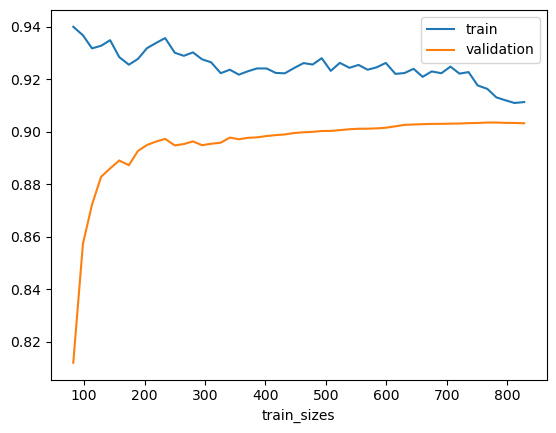

In [134]:

train_sizes, train_scores, test_scores = learning_curve(modelLasso,X_train,y_train,cv=5,train_sizes=np.linspace(0.1, 1.0, 50))   
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()

In [135]:
print(r2_score(modelLasso.predict(X_test),y_test))
print(mean_squared_error(modelLasso.predict(X_test),y_test,squared=False))

0.912481224438061
3353.301761371599


In [136]:
pickle_out = open("modelLasso.pkl", "wb") 
pickle.dump(modelLasso, pickle_out) 
pickle_out.close()